# Задание

У каждого есть свой набор данный, который можно найти в ведомости на вкладке "Логистическая регрессия":

https://clck.ru/32AKdJ

Скачиваете свой датасет с kaggle (для этого нужно авторизоваться с гугл аккаунт и скачать датасет).

In [ ]:
!pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle competitions download -c oilgas-field-prediction

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


**Ваша задача:**
1. Исследовать данные
2. Создать тренировочную и тестовую подвыборки
3. Построить модель логистической регрессии по своему набору данных (т.е. создать модель и обучить ее на тренировочной выборке)
4. Получить коэффиценты уравнения логистической регрессии (т.е. уравнение разделяющей поверхности). Сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему
5. Написать уравнение логистической регрессии.
6. Вывести confusion matrix для получившейся модели.
7. Вручную посчитать метрики: accuracy, recall, precision. f1.
8. Посчитать метрики с помощью библиотеки sklearn и сравнить с оценками из п.7.
9. Сделать письменный вывод получившихся результатов (хорошие или плохие получлись метрики и почему).

ВСЕ графики должны быть подписанны.
Ваша задача получить метрики как можно лучше.

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [124]:
df = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_1/main/%D0%92%D0%B5%D1%81%D0%B5%D0%BD%D0%BD%D0%B8%D0%B9%20%D1%81%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/home_work_2_log_reg/%D0%90%D0%BD%D0%BE%D1%85%D0%B8%D0%BD/train_oil.csv')
df = df[df['Onshore/Offshore'] != 'ONSHORE-OFFSHORE']
df.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [125]:
df_test = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_1/main/%D0%92%D0%B5%D1%81%D0%B5%D0%BD%D0%BD%D0%B8%D0%B9%20%D1%81%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/home_work_2_log_reg/%D0%90%D0%BD%D0%BE%D1%85%D0%B8%D0%BD/oil_test.csv')
df_test.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      304 non-null    object 
 1   Reservoir unit                  304 non-null    object 
 2   Country                         278 non-null    object 
 3   Region                          267 non-null    object 
 4   Basin name                      267 non-null    object 
 5   Tectonic regime                 304 non-null    object 
 6   Latitude                        278 non-null    float64
 7   Longitude                       275 non-null    float64
 8   Operator company                304 non-null    object 
 9   Onshore/Offshore                304 non-null    object 
 10  Hydrocarbon type                304 non-null    object 
 11  Reservoir status                304 non-null    object 
 12  Structural setting              304 

Field name - название месторождения

Reservoir unit - юнит месторождения

Country - страна расположения

Region - регион расположения

Basin name - название бассейна пород

Tectonic regime - тектонический режим

Latitude - широта

Longitude - долгота

Operator company - название компании

Onshore or oﬀshore - на суше или нет

Hydrocarbon type (main) - тип углеводорода

Reservoir status (current) - статус месторождения

Structural setting - структурные свойства

Depth (top reservoir ft TVD) - глубина

Reservoir period - литологический период

Lithology (main) - литология

Thickness (gross average ft) - общая толщина

Thickness (net pay average ft) - эффективная толщина

Porosity (matrix average 20. Permeability (air average mD) – проницаемость





**309 - 268 = 41**

In [ ]:
type(df['Lithology'].iloc[0]) == str

True

In [ ]:
for name in df_test.keys():
  if type(df[name].iloc[0]) == str:
    print(len(df[name].unique()) == len(df_test[name].unique()))

False
False
False
False
False
False
False
False
False
False
True
False


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

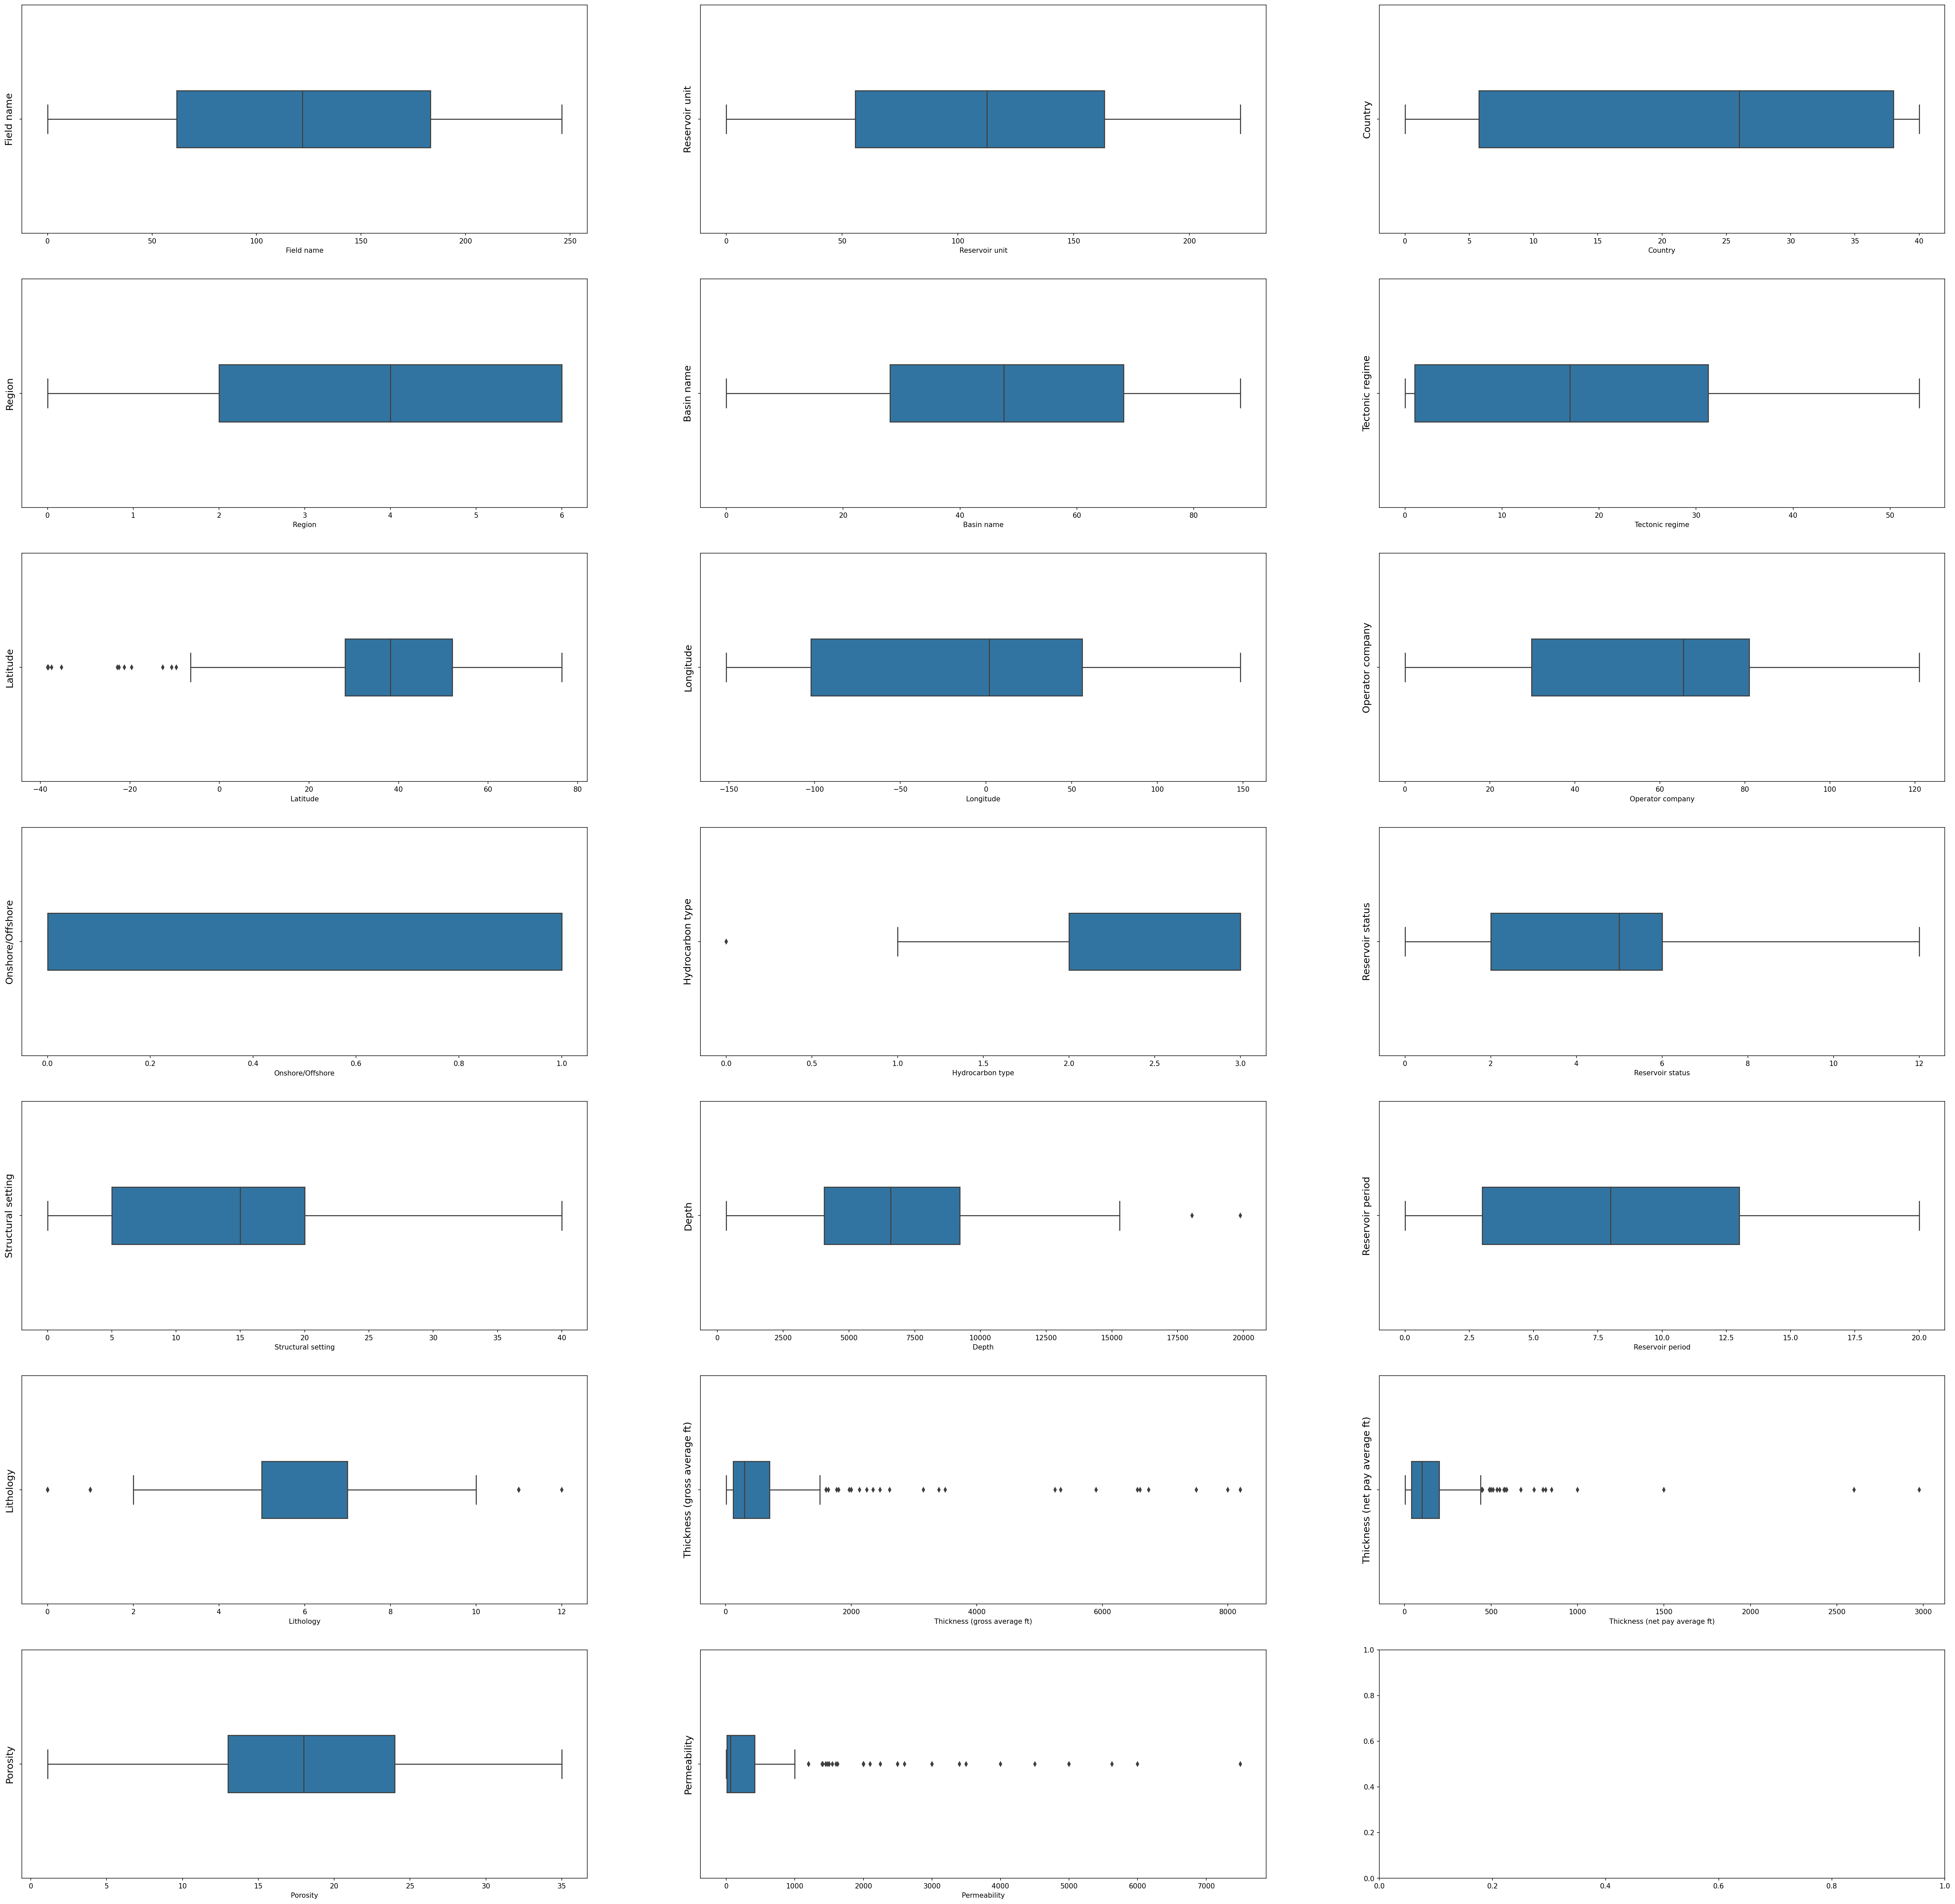

In [ ]:
fig, axes = plt.subplots(7, 3, figsize=(50,50), dpi=150)
c = 0

for name in df.keys():
  ax = axes[c//3][c%3]
  ax.set_ylabel(name, fontsize=14)
  
  sns.boxplot(df[name], ax=ax, width=0.25)
  c += 1

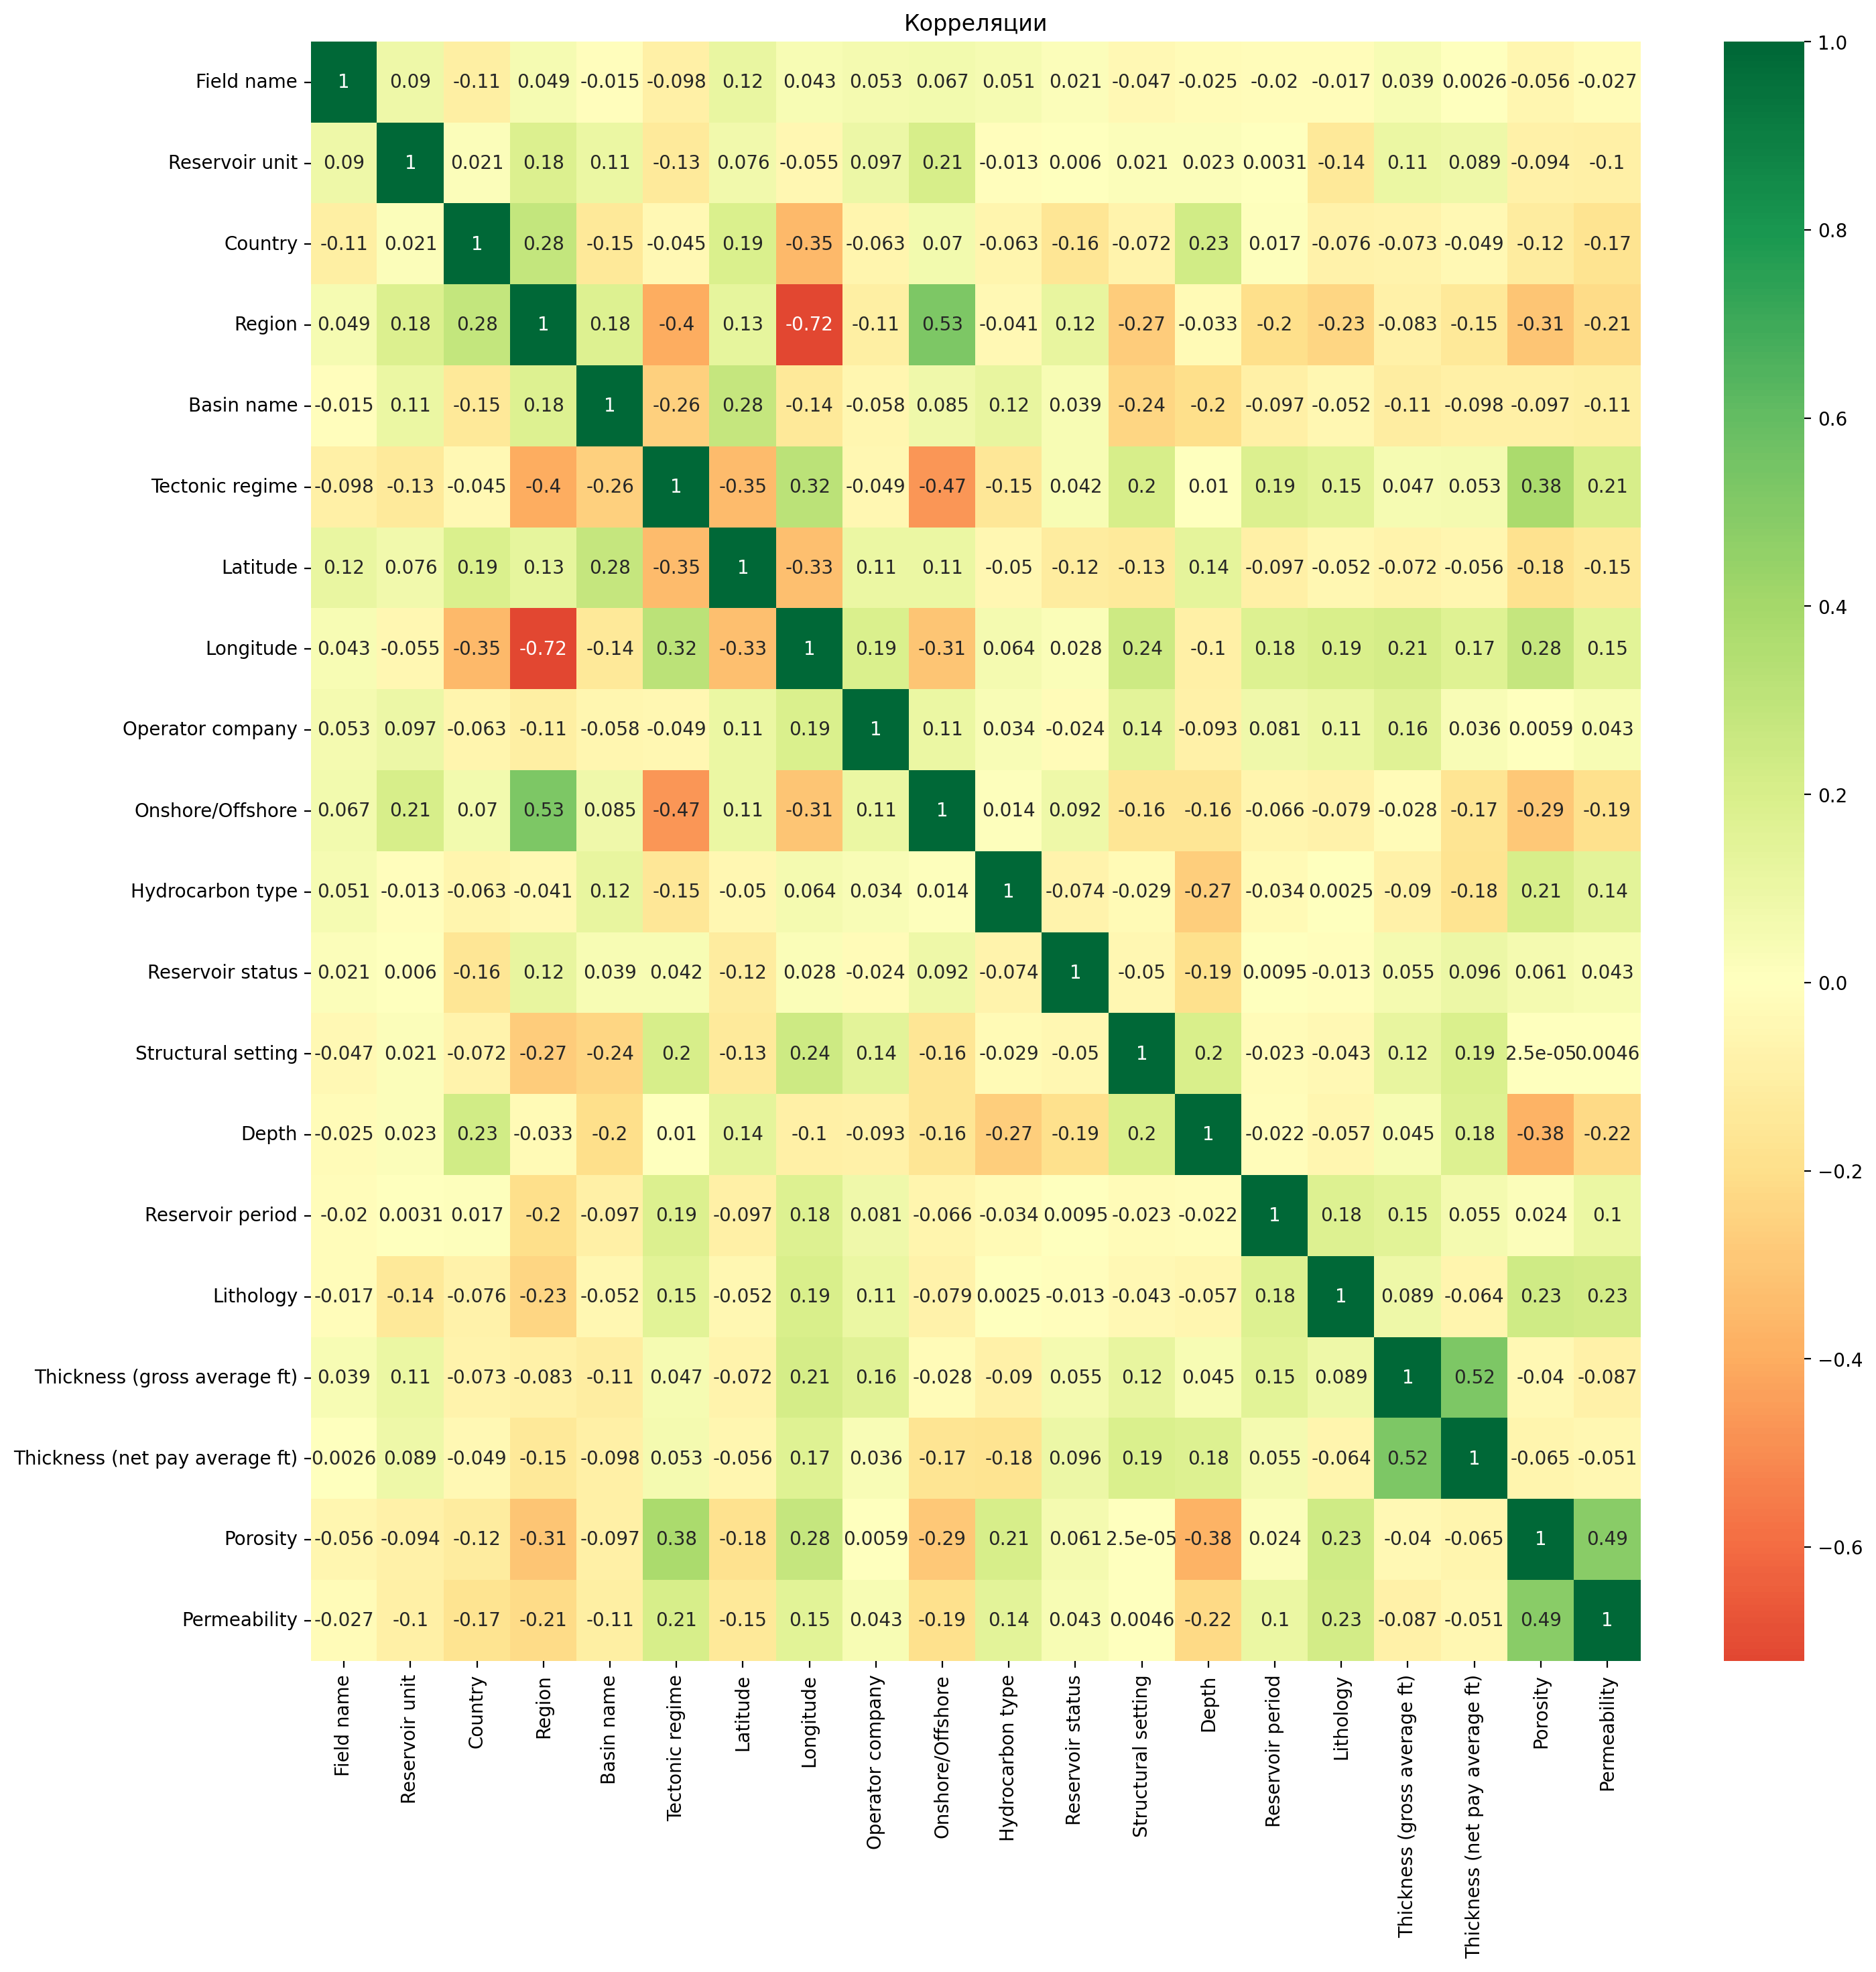

In [ ]:
plt.figure(figsize=(16, 16), dpi=200)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True, )
plt.title('Корреляции')
plt.show()

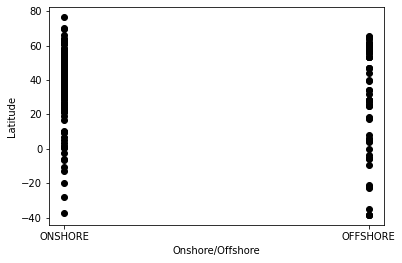

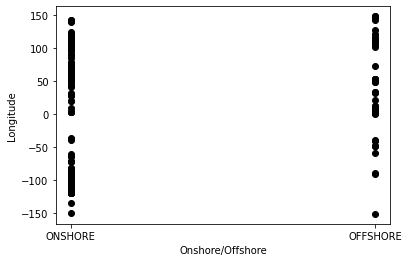

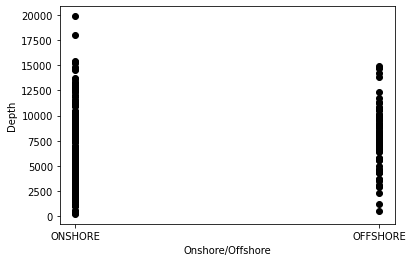

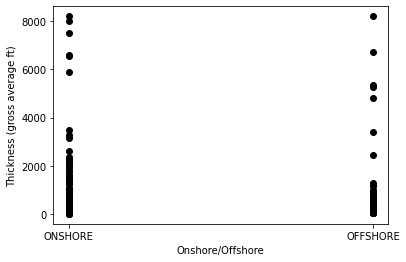

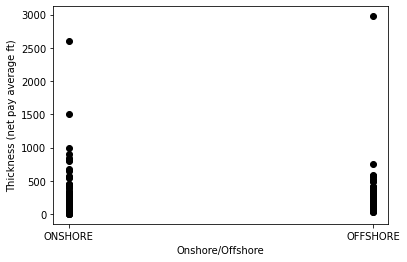

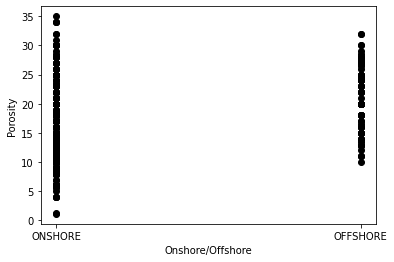

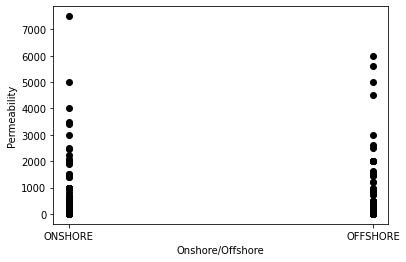

In [ ]:
cor_df = df.corr()

for column in cor_df.columns:
  if type(df[name].iloc[0]) == str: continue
  fig, ax = plt.subplots()
  plt.xlabel('Onshore/Offshore')        
  plt.ylabel(column)
  ax.scatter(df['Onshore/Offshore'], df[column], c = 'black')
  # plt.title(f"Корреляция: {cor_df['Onshore/Offshore'][column]}")
  plt.show()

In [ ]:
df.isna().sum()

Field name                        0
Reservoir unit                    0
Country                           0
Region                            0
Basin name                        0
Tectonic regime                   0
Latitude                          0
Longitude                         0
Operator company                  0
Onshore/Offshore                  0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Reservoir period                  0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

In [126]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      264 non-null    object 
 1   Reservoir unit                  264 non-null    object 
 2   Country                         264 non-null    object 
 3   Region                          264 non-null    object 
 4   Basin name                      264 non-null    object 
 5   Tectonic regime                 264 non-null    object 
 6   Latitude                        264 non-null    float64
 7   Longitude                       264 non-null    float64
 8   Operator company                264 non-null    object 
 9   Onshore/Offshore                264 non-null    object 
 10  Hydrocarbon type                264 non-null    object 
 11  Reservoir status                264 non-null    object 
 12  Structural setting              264 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      133 non-null    object 
 1   Reservoir unit                  133 non-null    object 
 2   Country                         120 non-null    object 
 3   Region                          117 non-null    object 
 4   Basin name                      125 non-null    object 
 5   Tectonic regime                 133 non-null    object 
 6   Latitude                        120 non-null    float64
 7   Longitude                       117 non-null    float64
 8   Operator company                133 non-null    object 
 9   Hydrocarbon type                133 non-null    object 
 10  Reservoir status                133 non-null    object 
 11  Structural setting              133 non-null    object 
 12  Depth                           133 

In [127]:
for d in [df_test, df]:

  d['Latitude'] = d['Latitude'].fillna(d['Latitude'].mean())
  d['Longitude'] = d['Longitude'].fillna(d['Longitude'].mean())
  d['Country'] = d['Country'].value_counts().idxmax()
  d['Region'] = d['Region'].value_counts().idxmax()
  d['Basin name'] = d['Basin name'].value_counts().idxmax()

In [128]:
def preprocess():
  global df
  global df_test

  full_df = pd.concat([df, df_test])
  encoders = {  }
  for name in df.keys():
    if type(df[name].iloc[0]) == str and name != 'Onshore/Offshore':
      encoder = OneHotEncoder()
      encoders[name] = encoder
      encoder.fit(full_df[[name]])

      sub_df_test = pd.DataFrame(encoder.transform(df_test[[name]]).toarray())
      sub_df = pd.DataFrame(encoder.transform(df[[name]]).toarray())

      for sub_name in sub_df.keys():
        df[name + "_" + str(sub_name)] = sub_df[sub_name]
      for sub_name in sub_df_test.keys():
        df_test[name + "_" + str(sub_name)] = sub_df_test[sub_name]
      df = df.drop(name, axis=1)
      df_test = df_test.drop(name, axis=1)
  return encoders

In [ ]:
df_test.isna().sum()

Field name                        0
Reservoir unit                    0
Country                           0
Region                            0
Basin name                        0
Tectonic regime                   0
Latitude                          0
Longitude                         0
Operator company                  0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Reservoir period                  0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

**----------------------------------------------------------------------**

In [8]:
df=df.drop(["Field name","Hydrocarbon type","Reservoir unit","Country", "Region","Reservoir period","Basin name","Operator company","Tectonic regime","Lithology","Structural setting","Reservoir status"],axis=1)
df_test=df_test.drop(["Field name","Hydrocarbon type","Reservoir unit","Country","Region","Reservoir period","Basin name","Operator company","Tectonic regime","Lithology","Structural setting","Reservoir status"],axis=1)

**-----------------------------------------------------------------**

In [129]:
preprocess()

<ipython-input-128-a92c933e4052>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[name + "_" + str(sub_name)] = sub_df[sub_name]
<ipython-input-128-a92c933e4052>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[name + "_" + str(sub_name)] = sub_df_test[sub_name]
<ipython-input-128-a92c933e4052>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  T

{'Field name': OneHotEncoder(),
 'Reservoir unit': OneHotEncoder(),
 'Country': OneHotEncoder(),
 'Region': OneHotEncoder(),
 'Basin name': OneHotEncoder(),
 'Tectonic regime': OneHotEncoder(),
 'Operator company': OneHotEncoder(),
 'Hydrocarbon type': OneHotEncoder(),
 'Reservoir status': OneHotEncoder(),
 'Structural setting': OneHotEncoder(),
 'Reservoir period': OneHotEncoder(),
 'Lithology': OneHotEncoder()}

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 308
Columns: 1028 entries, Latitude to Lithology_16
dtypes: float64(1026), int64(1), object(1)
memory usage: 2.1+ MB


In [131]:
df['Onshore/Offshore'] = df['Onshore/Offshore'].map({'ONSHORE': 0, 'OFFSHORE':1})

In [ ]:
df.keys()

Index(['Latitude', 'Longitude', 'Onshore/Offshore', 'Depth',
       'Thickness (gross average ft)', 'Thickness (net pay average ft)',
       'Porosity', 'Permeability', 'Field name_0', 'Field name_1',
       ...
       'Lithology_7', 'Lithology_8', 'Lithology_9', 'Lithology_10',
       'Lithology_11', 'Lithology_12', 'Lithology_13', 'Lithology_14',
       'Lithology_15', 'Lithology_16'],
      dtype='object', length=1162)

In [135]:
X = df.drop(['Onshore/Offshore'], axis=1)
y = df['Onshore/Offshore']

In [134]:
df.isna().sum()

Latitude                        0
Longitude                       0
Onshore/Offshore                0
Depth                           0
Thickness (gross average ft)    0
                               ..
Lithology_12                    0
Lithology_13                    0
Lithology_14                    0
Lithology_15                    0
Lithology_16                    0
Length: 1028, dtype: int64

In [133]:
df = df.fillna(0)

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [201]:
model = LogisticRegression()

In [202]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [203]:
answers_pred = model.predict(X_test)

In [204]:
print(accuracy_score(y_test,answers_pred))

0.7375


Если удалить все object поля

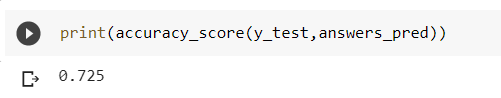

In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 138 to 175
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        184 non-null    float64
 1   Longitude                       184 non-null    float64
 2   Depth                           184 non-null    int64  
 3   Thickness (gross average ft)    184 non-null    float64
 4   Thickness (net pay average ft)  184 non-null    float64
 5   Porosity                        184 non-null    float64
 6   Permeability                    184 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.5 KB


In [205]:
recall_score(y_test,answers_pred)

0.13636363636363635

In [206]:
precision_score(y_test,answers_pred)

0.6

In [207]:
f1_score(y_test,answers_pred)

0.22222222222222218

**==========================================================================================**

In [208]:
w0 = model.intercept_
wn = model.coef_.reshape((-1))
print(w0)
print(wn)

[-0.01123087]
[-9.15300256e-03  8.84987651e-03  1.99441579e-05 ...  9.61208697e-04
 -1.20102597e-03 -3.11899273e-04]


In [209]:
equation = f"y = {w0[0]}"
for i in range(len(wn)):
  equation += " + " + str(wn[i]) + f" * x{i+1}"
print(equation)

y = -0.01123086645140137 + -0.009153002561203105 * x1 + 0.008849876507700293 * x2 + 1.99441578800143e-05 * x3 + -0.00018351984623035986 * x4 + 0.0002973780181174431 * x5 + -0.026817388921950264 * x6 + 0.0001622740180386992 * x7 + -0.0006303006198797004 * x8 + 0.0 * x9 + 0.0 * x10 + 0.0 * x11 + -0.00042341535510995653 * x12 + 0.0 * x13 + -0.00023297737867823088 * x14 + 0.0 * x15 + 0.0009927408346852593 * x16 + 0.0 * x17 + 0.0 * x18 + 0.0 * x19 + -0.0006488212682813236 * x20 + 0.0008522710141543228 * x21 + 0.0 * x22 + 0.0 * x23 + 0.0009428217182188995 * x24 + 0.0 * x25 + 0.0008952221218557529 * x26 + 0.0 * x27 + -0.00020537575649486522 * x28 + 0.0 * x29 + -0.00038882326293798313 * x30 + 0.0 * x31 + 0.0009398895401393499 * x32 + 0.0 * x33 + 0.0002353257001412022 * x34 + -0.000310328537897367 * x35 + 0.0 * x36 + 0.0 * x37 + -0.0007446146052137032 * x38 + 0.0 * x39 + -0.0005422766138808068 * x40 + -0.00013972269967548265 * x41 + 0.0 * x42 + 0.0 * x43 + 0.0 * x44 + 0.0 * x45 + 0.0 * x46 + 0.

In [97]:
pairs = []
i = 0
for key in X_train.keys():
  pairs.append((key, wn[i]))
  i += 1

pairs.sort(key=lambda x: -abs(x[1]))
pairs

[('Porosity', 0.18350786417622084),
 ('Longitude', 0.009700839284940794),
 ('Latitude', -0.004259532910957926),
 ('Thickness (net pay average ft)', 0.0012723216110352427),
 ('Depth', 0.0003368352724611909),
 ('Thickness (gross average ft)', -0.00024247997562910513),
 ('Permeability', -9.606202002612922e-06)]

**==============================================================================**

In [ ]:
# ---

In [ ]:
print(accuracy_score(y_train,pred))

0.9933993399339934


**=========================================================================**

In [ ]:
pred = model.predict(df_test)
pred

In [ ]:
sumbit = pd.DataFrame(pred, columns=['Onshore/Offshore'])

In [ ]:
sumbit

In [ ]:
# sumbit['Onshore/Offshore'] = sumbit['Onshore/Offshore'].map({0: 'ONSHORE', 1: 'OFFSHORE'})
sumbit.index.name="index"

In [ ]:
sumbit.to_csv("sumbit.csv")

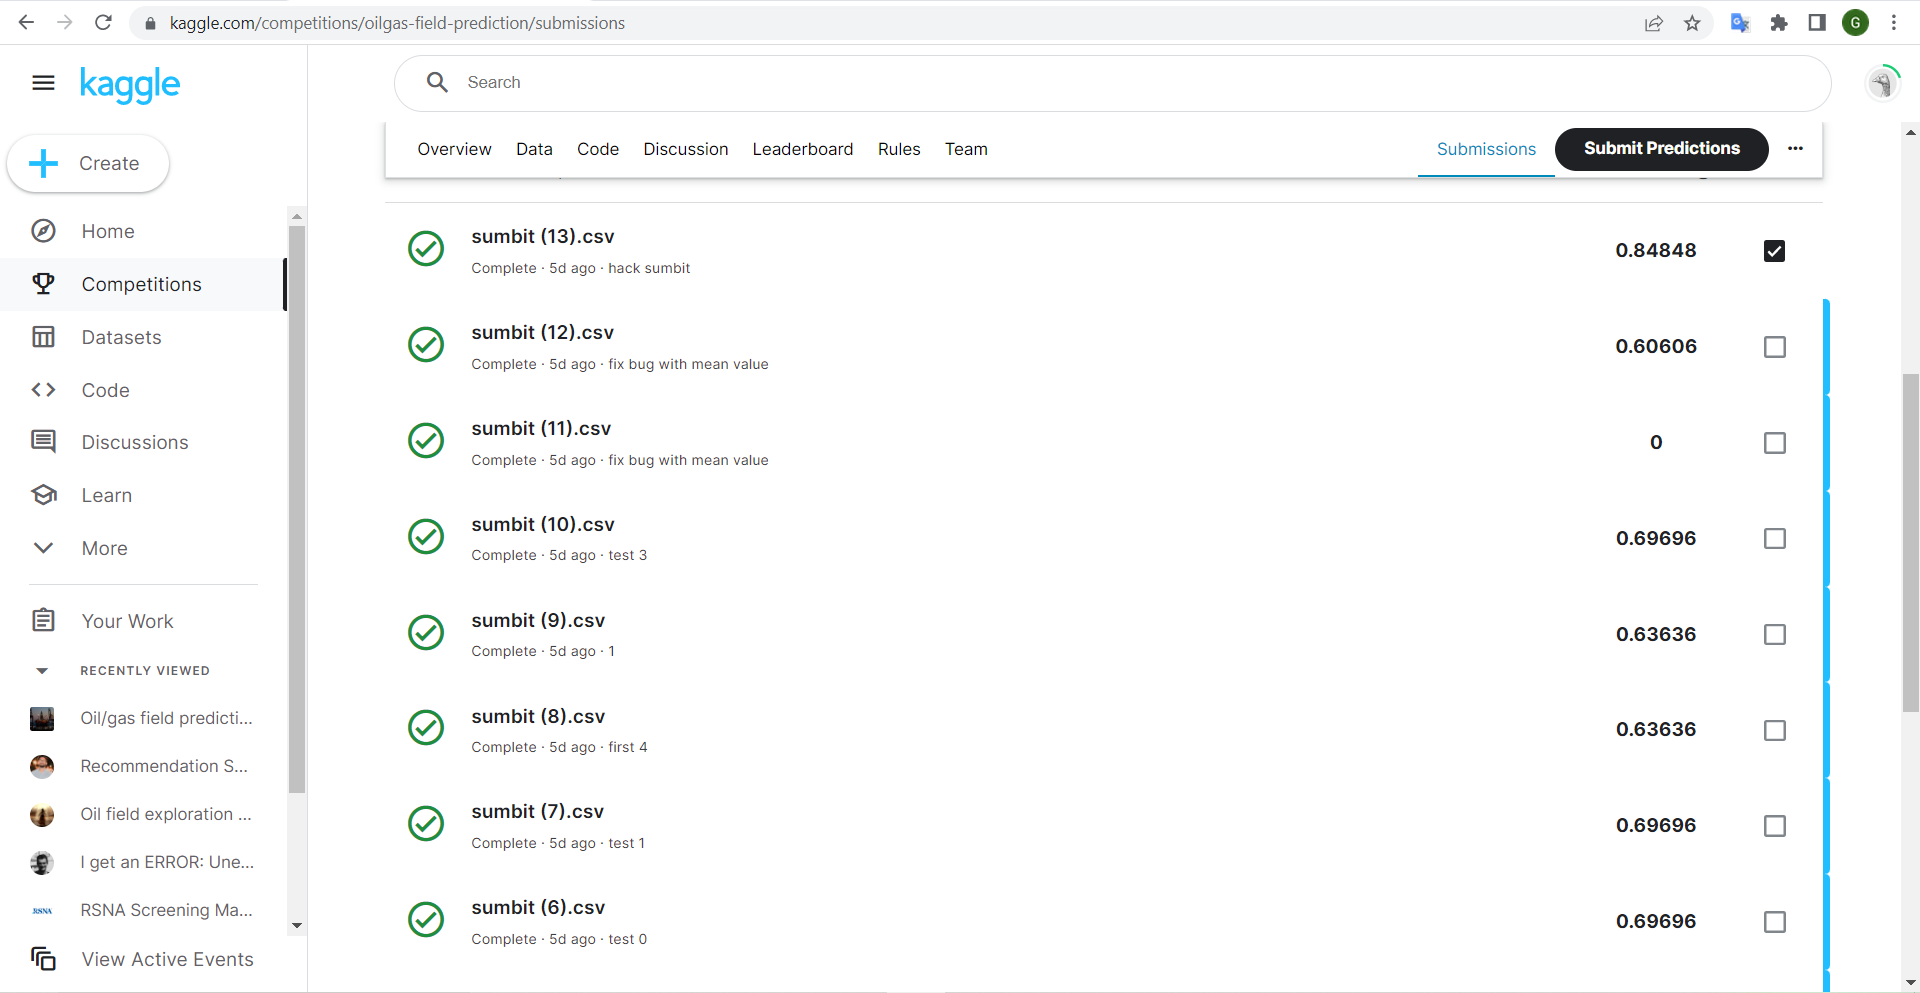